In [1]:
%cd ~/cdv
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1,2'
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import rho_plus as rp

is_dark = False
theme, cs = rp.mpl_setup(is_dark)
rp.plotly_setup(is_dark)

/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/nmiklaucic/cdv


In [2]:
from pathlib import Path
from facet.data.databatch import CrystalGraphs
from facet.layers import Context
import pyrallis
from facet.config import MainConfig
import orbax.checkpoint as ocp

from facet.training_state import TrainingRun
from facet.checkpointing import best_ckpt


conf_file = 'configs/sevennet.toml'

with open(conf_file) as f:
    config = pyrallis.cfgparsing.load(MainConfig, f)

from facet.data.dataset import load_file

config.data.dataset_name = 'mptrj'
cgs = []
for i in range(1):
    cgs.append(load_file(config, group_num=0, file_num=i))

cg: CrystalGraphs = sum(cgs[1:], start=cgs[0])

model = config.build_regressor()

params = model.init(jax.random.key(29205), cg=cg, ctx=Context(training=True))

param_size = sum(x.size for x in jax.tree.leaves(params))
param_size

842748

In [3]:
from facet.utils import load_pytree, debug_structure

ckpt = load_pytree('precomputed/sevennet.ckpt')
debug_structure(ckpt);

arg0 >>> params
├── edge_embedding >>> basis >>> freq
│   └── f32[8]
├── head
│   ├── Dense_0 >>> kernel
│   │   └── f32[128, 64]
│   └── Dense_1 >>> kernel
│       └── f32[64, 1]
├── mace
│   ├── layer_0 >>> interaction
│   │   ├── SimpleInteraction_0
│   │   │   ├── SevenNetConv_0 >>> LazyInMLP_0
│   │   │   │   ├── Dense_0
│   │   │   │   │   └── {...}
│   │   │   │   ├── Dense_1
│   │   │   │   │   └── {...}
│   │   │   │   └── Dense_2
│   │   │   │       └── {...}
│   │   │   ├── linear_intro >>> w[0,0] 128x0e,128x0e
│   │   │   │   └── f32[128, 128]
│   │   │   └── linear_outro
│   │   │       ├── w[0,0] 128x0e,224x0e
│   │   │       │   └── f32[128, 224]
│   │   │       ├── w[1,1] 128x1e,64x1e
│   │   │       │   └── f32[128, 64]
│   │   │       └── w[2,2] 128x2e,32x2e
│   │   │           └── f32[128, 32]
│   │   └── resid_adapter >>> w[0,0] 128x0e,224x0e
│   │       └── f32[128, 224]
│   ├── layer_1 >>> interaction
│   │   ├── SimpleInteraction_0
│   │   │   ├── SevenNetConv_0 >>> LazyInMLP_0
│   │   │   │   ├── Dense_0
│   │   │   │   │   └── {...}
│   │   │   │   ├── Dense_1
│   │   │   │   │   └── {...}
│   │   │   │   └── Dense_2
│   │   │   │       └── {...}
│   │   │   ├── linear_intro
│   │   │   │   ├── w[0,0] 128x0e,128x0e
│   │   │   │   │   └── f32[128, 128]
│   │   │   │   ├── w[1,1] 64x1e,64x1e
│   │   │   │   │   └── f32[64, 64]
│   │   │   │   └── w[2,2] 32x2e,32x2e
│   │   │   │       └── f32[32, 32]
│   │   │   └── linear_outro
│   │   │       ├── w[0,0] 224x0e,224x0e
│   │   │       │   └── f32[224, 224]
│   │   │       ├── w[1,1] 384x1e,64x1e
│   │   │       │   └── f32[384, 64]
│   │   │       └── w[2,2] 352x2e,32x2e
│   │   │           └── f32[352, 32]
│   │   └── resid_adapter
│   │       ├── w[0,0] 128x0e,224x0e
│   │       │   └── f32[128, 224]
│   │       ├── w[1,1] 64x1e,64x1e
│   │       │   └── f32[64, 64]
│   │       └── w[2,2] 32x2e,32x2e
│   │           └── f32[32, 32]
│   ├── layer_2 >>> interaction
│   │   ├── SimpleInteraction_0
│   │   │   ├── SevenNetConv_0 >>> LazyInMLP_0
│   │   │   │   ├── Dense_0
│   │   │   │   │   └── {...}
│   │   │   │   ├── Dense_1
│   │   │   │   │   └── {...}
│   │   │   │   └── Dense_2
│   │   │   │       └── {...}
│   │   │   ├── linear_intro
│   │   │   │   ├── w[0,0] 128x0e,128x0e
│   │   │   │   │   └── f32[128, 128]
│   │   │   │   ├── w[1,1] 64x1e,64x1e
│   │   │   │   │   └── f32[64, 64]
│   │   │   │   └── w[2,2] 32x2e,32x2e
│   │   │   │       └── f32[32, 32]
│   │   │   └── linear_outro
│   │   │       ├── w[0,0] 224x0e,224x0e
│   │   │       │   └── f32[224, 224]
│   │   │       ├── w[1,1] 384x1e,64x1e
│   │   │       │   └── f32[384, 64]
│   │   │       └── w[2,2] 352x2e,32x2e
│   │   │           └── f32[352, 32]
│   │   └── resid_adapter
│   │       ├── w[0,0] 128x0e,224x0e
│   │       │   └── f32[128, 224]
│   │       ├── w[1,1] 64x1e,64x1e
│   │       │   └── f32[64, 64]
│   │       └── w[2,2] 32x2e,32x2e
│   │           └── f32[32, 32]
│   ├── layer_3 >>> interaction
│   │   ├── SimpleInteraction_0
│   │   │   ├── SevenNetConv_0 >>> LazyInMLP_0
│   │   │   │   ├── Dense_0
│   │   │   │   │   └── {...}
│   │   │   │   ├── Dense_1
│   │   │   │   │   └── {...}
│   │   │   │   └── Dense_2
│   │   │   │       └── {...}
│   │   │   ├── linear_intro
│   │   │   │   ├── w[0,0] 128x0e,128x0e
│   │   │   │   │   └── f32[128, 128]
│   │   │   │   ├── w[1,1] 64x1e,64x1e
│   │   │   │   │   └── f32[64, 64]
│   │   │   │   └── w[2,2] 32x2e,32x2e
│   │   │   │       └── f32[32, 32]
│   │   │   └── linear_outro
│   │   │       ├── w[0,0] 224x0e,224x0e
│   │   │       │   └── f32[224, 224]
│   │   │       ├── w[1,1] 384x1e,64x1e
│   │   │       │   └── f32[384, 64]
│   │   │       └── w[2,2] 352x2e,32x2e
│   │   │           └── f32[352, 32]
│   │   └── resid_adapter
│   │       ├── w[0,0] 128x0e,224x0e
│   │       │   └── f32[128, 224]
│   │       ├── w[1,1] 64x1e,64x1e
│   │       │   └── f32[64, 64]
│   │       └── w[2,2] 32x2e,32x2e
│   │           └──

In [4]:
ctx = Context(training=False)
rng = jax.random.key(29205)
mod_ckpt = model.bind(ckpt)
out = mod_ckpt(cg=cg, ctx=ctx)
out.reshape(-1)


Array([ -7.8997445,  -6.8716917,  -5.961403 ,  -4.283994 ,  -5.1842265,
        -8.966918 ,  -5.315304 ,  -7.450509 ,  -5.53804  ,  -5.687567 ,
        -4.1991224,  -7.7113285,  -6.5472093,  -6.72607  ,  -5.081302 ,
        -7.1649303,  -5.8647666,  -6.5488596,  -6.1808586,  -5.2782817,
       -10.373532 ,  -4.054508 ,  -8.35315  ,  -5.239945 ,  -6.4754243,
        -3.6816647,  -7.073906 ,  -7.288776 ,  -9.82559  ,  -5.912794 ,
        -7.044846 ,   0.       ], dtype=float32)

In [5]:
jnp.diff(mod_ckpt.edge_embedding.basis.freq)


Array([0.6020485 , 0.6165761 , 0.6501528 , 0.66251516, 0.6809077 ,
       0.694077  , 0.7044778 ], dtype=float32)

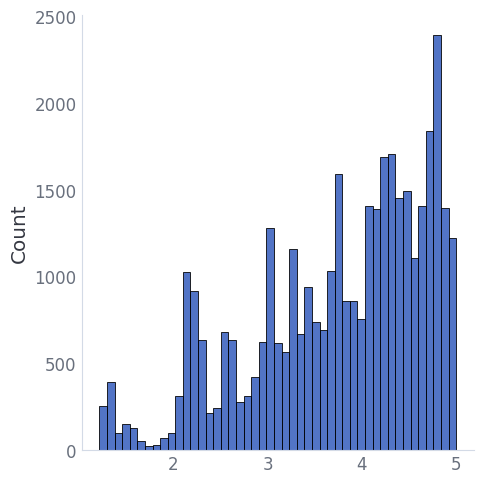

In [6]:
from facet.layers import dists

rmax = config.model.edge_embed.r_max

cg_dists = dists(cg)[cg.padding_mask[cg.nodes.graph_i]]
cg_dists = cg_dists.reshape(-1)
cg_dists = cg_dists[cg_dists < rmax]

sns.displot(cg_dists)

rr = jnp.quantile(cg_dists, jnp.linspace(0, 1, 128))

In [7]:
from facet.mace.edge_embedding import BesselBasis, SincBasis

trim_params = jax.tree.map(lambda x: x, ckpt)

ckpt_basis = mod_ckpt.edge_embedding.basis
ckpt_bb = ckpt_basis(rr, rmax, ctx)
cutoff = mod_ckpt.edge_embedding.envelope(rr, rmax, ctx)[..., None]

num_basis = 10
basis = BesselBasis(num_basis, True).bind({'params': {'freq': jnp.hstack((ckpt_basis.freq, jnp.quantile(ckpt_basis.freq, jnp.linspace(0, 1, num_basis - ckpt_basis.num_basis + 2)[1:-1])))}})
bb = basis(rr, rmax, ctx) * cutoff

trim_params['params']['edge_embedding']['basis']['freq'] = basis.freq

data = []

new_weights = []

for layer_i in range(5):
    w_mlp_params = ckpt['params']['mace'][f'layer_{layer_i}']['interaction']['SimpleInteraction_0']['SevenNetConv_0']['LazyInMLP_0']    
    w_mlp = mod_ckpt.mace.layers[layer_i].interaction.interaction.conv.radial_weight.copy(out_dim=w_mlp_params['Dense_2']['kernel'].shape[-1])

    ww = w_mlp.apply({'params': w_mlp_params}, rngs=rng, x=ckpt_bb, ctx=ctx) * cutoff
    # plt.plot(rr, ww, lw=0.3, alpha=0.2, c='grey')

    x, resid, rank, s = jnp.linalg.lstsq(bb, ww)
    ww_hat = bb @ x
    ww_err = (ww - ww_hat)
    r2 = 1 - (jnp.mean(jnp.square(ww_err)) / jnp.var(ww.reshape(-1))).item()
    print(f'{r2:.2%}')
    mlp_trim = trim_params['params']['mace'][f'layer_{layer_i}']['interaction']['SimpleInteraction_0']['SevenNetConv_0']['LazyInMLP_0']
    for dense in list(mlp_trim.keys()):
        if dense.startswith('Dense_'):
            if dense == 'Dense_0':
                mlp_trim[dense]['kernel'] = x    
            else:
                del mlp_trim[dense]

    data.append({'mlp': ww, 'spline': ww_hat})

99.74%
99.88%
99.78%
99.76%
99.96%


In [8]:
np.save('data/sevennet_basis.npy', {
    'cutoff': cutoff,
    'basis': ckpt_bb,
    'data': data,
    'rr': rr,
})

In [8]:
from operator import add
print(jax.tree.reduce(add, jax.tree.map(lambda x: x.size, trim_params)))
print(jax.tree.reduce(add, jax.tree.map(lambda x: x.size, ckpt)))

631358
842748


In [9]:
from facet.utils import save_pytree


save_pytree(trim_params, 'precomputed/sevennet-trimmed.ckpt')